# M.ª de los Ángeles Martín de la Cruz

# Actividad 3.4 – Representación plot de datasets, selección de características y entrenamiento de modelos

## Dataset utilizado en la actividad

https://www.kaggle.com/datasets/hopesb/student-depression-dataset

##  Describir el origen y breve explicación del Dataset, así como de cada una de las características.


El "Student Depression Dataset" contiene información recolectada a través de encuestas para identificar niveles de depresión en estudiantes universitarios. Incluye variables como género, edad, historial médico, rendimiento académico, estilo de vida, y síntomas específicos relacionados con la salud mental. Este dataset está diseñado para facilitar investigaciones en psicología y estudios sociales sobre cómo factores individuales y contextuales afectan la salud mental de los estudiantes. Su propósito es ofrecer un recurso para entender y abordar mejor la depresión estudiantil.

## Procesamiento de datos en el dataset:

## 1. Descarga y carga del dataset:

In [1]:
import kagglehub

path = kagglehub.dataset_download("hopesb/student-depression-dataset")
print("Path to dataset files:", path)


100%|██████████| 454k/454k [00:00<00:00, 14.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hopesb/student-depression-dataset/versions/1


In [2]:
import os
print(os.listdir(path))

['Student Depression Dataset.csv']


In [3]:
import pandas as pd
data = pd.read_csv(path + "/Student Depression Dataset.csv")


## 2. Revisión inicial:


### Comprobamos las columnas y los tipos de datos:

In [4]:
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

El dataset tiene 18 columnas y 27,901 filas, con las siguientes características principales:


1. Datos demográficos y generales:

 - id: Identificador único.
 - Gender: Género del estudiante.
 - Age: Edad.
 - City: Ciudad de residencia.
 - Profession: Ocupación (generalmente "Student").

2. Factores académicos y laborales:

 - Academic Pressure y Work Pressure: Nivel de presión académica y laboral (escala de 0 a 5).
 - CGPA: Promedio académico.
 - Study Satisfaction y Job Satisfaction: Satisfacción en estudio/trabajo (escala de 0 a 5).

3. Estilo de vida y salud mental:

 - Sleep Duration: Duración del sueño (categorías como "5-6 hours").
 - Dietary Habits: Hábitos alimenticios ("Healthy", "Moderate").
 - Have you ever had suicidal thoughts?: Respuesta sí/no.
 - Work/Study Hours: Horas dedicadas a trabajo/estudio.
 - Financial Stress: Estrés financiero (escala de 0 a 5).
 - Family History of Mental Illness: Antecedentes familiares de enfermedades mentales.

4. Etiqueta principal:

 - Depression: Indicador binario (1 = con depresión, 0 = sin depresión).

La mayoría de las columnas tienen datos completos, salvo Financial Stress (3 valores nulos). Los datos categóricos como género, duración del sueño y hábitos alimenticios deben procesarse antes de un análisis o modelado.

### Manejo de valores faltantes:

Solo la columna Financial Stress tiene valores nulos, los cuales reemplazaremos con la media:

In [5]:
data['Financial Stress'].fillna(data['Financial Stress'].mean(), inplace=True)


<ipython-input-5-4ca79576a1f1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(data['Financial Stress'].mean(), inplace=True)


### Conversión de variables categóricas:

Hay varias columnas categóricas (Gender, City, etc.).

- Si usamos pd.get_dummies() para transformarlas creará variables categóricas en columnas binarias.

- Si usamos LabelEncoder() conviertirá cada columna categórica en valores numéricos discretos.

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Columnas categóricas identificadas
#categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration',
#                       'Dietary Habits', 'Degree',
#                       'Have you ever had suicidal thoughts ?',
#                       'Family History of Mental Illness']

# Crear variables dummy para todas las columnas categóricas
#data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration',
                       'Dietary Habits', 'Degree',
                       'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Revisar las columnas después de la conversión
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  int64  
 4   Profession                             27901 non-null  int64  
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

- Detalles de la salida con pd.get_dummies():

 - El dataset tiene 27,901 filas, que se mantienen iguales.
 - Ahora el dataset tiene 111 columnas debido a las nuevas columnas creadas para cada categoría de las variables categóricas.
 - dtypes: bool(101), float64(8), int64(2):
 - 101 columnas son de tipo bool (resultantes de las variables dummy).
 - 8 columnas son numéricas continuas (float64), como CGPA, Age, etc.
 - 2 columnas son enteras (int64), como id y Depression.
 - memory usage: 4.8 MB:

 El tamaño total del dataset en memoria es de 4.8 MB, incluso con las nuevas columnas, debido a la optimización de las variables bool. Esto significa que las variables categóricas se han convertido correctamente.

- Detalles de salida con LabelEncoder():

 - El dataset tiene 27,901 filas, que se mantienen iguales.
 - El dataset sigue teniendo 18 columnas.
 - dtypes: float64(8), int64(10)
 - 8 columnas son numéricas continuas (float64), como CGPA, Age, etc.
 - 10 columnas son enteras (int64), como id y Depression.
 - memory usage: 3.8 MB
 - El tamaño total del dataset es de 3.5 MB, esto se podría deber a la utilización de menos columnas.


### Escalado y normalización:

El escalado y normalización con StandardScaler sirve para ajustar los valores numéricos del dataset a una escala uniforme.

El próposito es la normalización es conviertir los datos para que tengan media = 0 y desviación estándar = 1. Esto elimina sesgos relacionados con diferentes escalas entre las variables.

Ejemplo: Age puede estar entre 18-60, mientras que CGPA va de 0-10. Sin escalado, modelos como regresión lineal o KNN pueden dar más peso a variables con valores mayores. Mejora del desempeño: Algunos algoritmos (SVM, redes neuronales, etc.) necesitan datos escalados para funcionar de manera eficiente.



In [7]:
from sklearn.preprocessing import StandardScaler

# Lista de columnas numéricas que necesitan escalado
numeric_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                   'Study Satisfaction', 'Job Satisfaction',
                   'Work/Study Hours', 'Financial Stress']

# Inicializar el escalador
scaler = StandardScaler()

# Escalar y normalizar las columnas
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Verificación rápida de los resultados
print(data[numeric_columns].head())


        Age  Academic Pressure  Work Pressure      CGPA  Study Satisfaction  \
0  1.463165           1.345543      -0.009777  0.893393           -0.693425   
1 -0.371474          -0.826104      -0.009777 -1.194076            1.510636   
2  1.055467          -0.102222      -0.009777 -0.425724            1.510636   
3  0.443921          -0.102222      -0.009777 -1.404862           -0.693425   
4 -0.167625           0.621660      -0.009777  0.322229            0.041262   

   Job Satisfaction  Work/Study Hours  Financial Stress  
0          -0.01534         -1.121213         -1.488868  
1          -0.01534         -1.121213         -0.793092  
2          -0.01534          0.497095         -1.488868  
3          -0.01534         -0.851495          1.294237  
4          -0.01534         -1.660650         -1.488868  


La salida muestra los valores normalizados (escalados) de las columnas numéricas seleccionadas.

Media = 0 y desviación estándar = 1: Cada columna fue transformada para centrar los datos alrededor de 0 y ajustar la dispersión en una escala estándar. Por ejemplo:

 - Age: 1.463165 significa que el valor está 1.46 desviaciones estándar por encima de la media.
 - Academic Pressure: 1.345543 está 1.34 desviaciones estándar por encima de la media.

Comparabilidad: Ahora todas las columnas numéricas están en la misma escala, lo que es esencial para algoritmos sensibles a magnitudes, como KNN o SVM.

Interpretación: Los valores positivos están por encima de la media, y los negativos por debajo. Por ejemplo:

En Work/Study Hours, -1.121213 indica menos horas que el promedio.

### Eliminación de columnas irrelevantes:

La columna id no aporta valor, así que procedemos a eliminarla:

In [8]:
data.drop(['id'], axis=1, inplace=True)

# Verificar que la columna 'id' ha sido eliminada
print(data.columns)

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


## 3. Utilización de herramientas para la selección de características


### 3.1. Matriz de gráficos de correlación

Esto te ayuda a identificar las relaciones entre las variables numéricas.

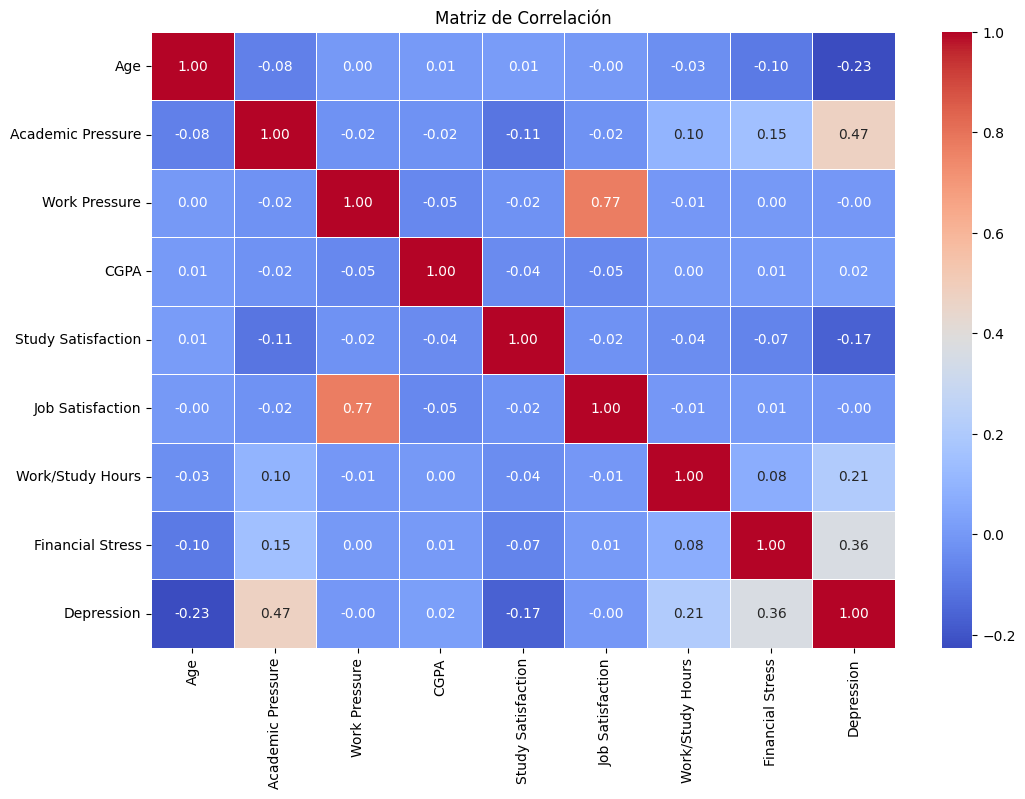

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos la variable 'relevant_columns' porque si no todo el gráfico se ve muy saturado
relevant_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                    'Study Satisfaction', 'Job Satisfaction',
                    'Work/Study Hours', 'Financial Stress', 'Depression']

# Calcular la matriz de correlación
correlation_matrix = data[relevant_columns].corr()

# Graficar la matriz de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


Objetivo: Identificar relaciones lineales entre las variables.

Interpretación:
Los valores de la matriz oscilan entre -1 y 1:
 - Cercano a 1: Fuerte correlación positiva (cuando una variable aumenta, la otra también).
 - Cercano a -1: Fuerte correlación negativa (cuando una variable aumenta, la otra disminuye).
 - Cercano a 0: Relación débil o inexistente.

Buscamos valores altos (positivos o negativos) entre las variables predictoras y la variable objetivo (Depression).

### 3.2. Matriz de gráficos de dispersión

Esto visualiza las relaciones entre variables numéricas en pares:

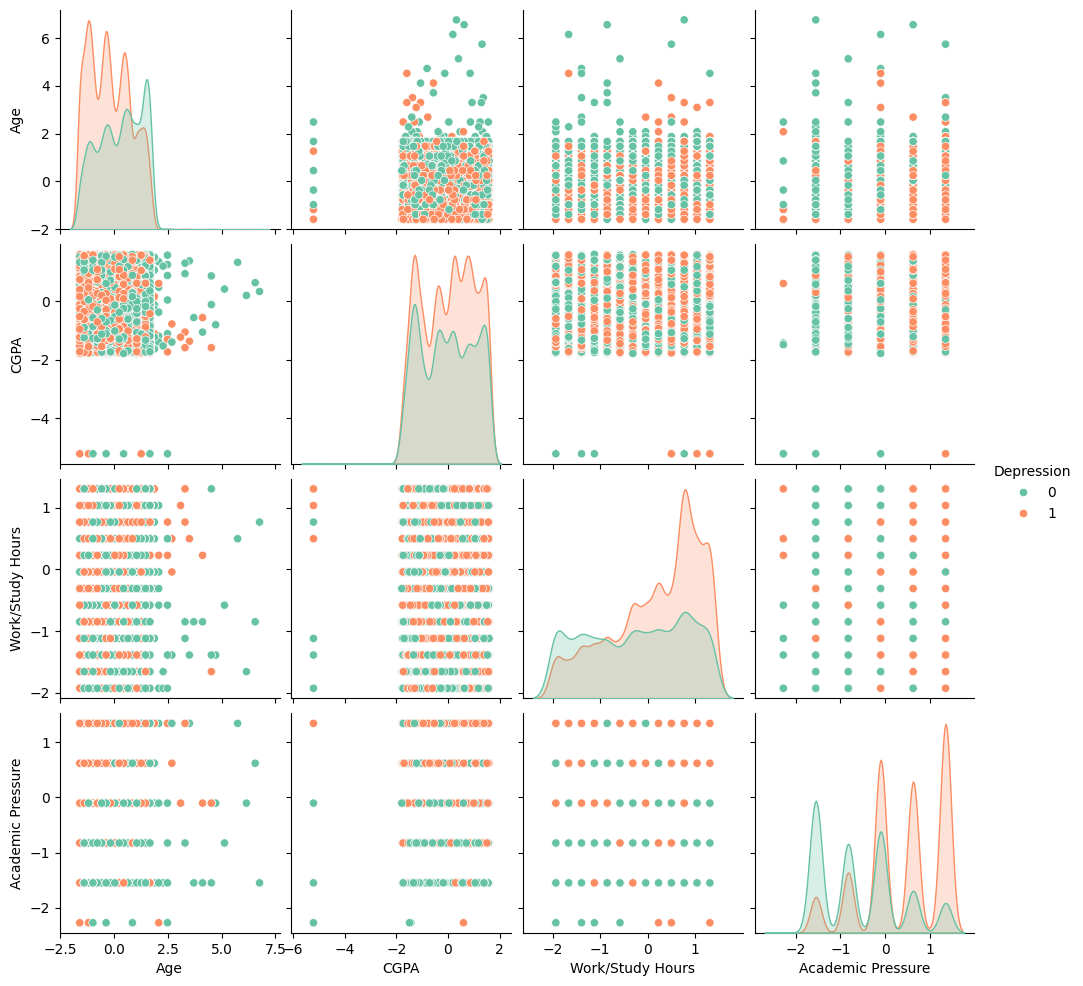

In [10]:
# Seleccionar un subconjunto de columnas numéricas relevantes para graficar
scatter_columns = ['Age', 'CGPA', 'Work/Study Hours', 'Academic Pressure', 'Depression']

# Crear la matriz de gráficos de dispersión
sns.pairplot(data[scatter_columns], diag_kind='kde', hue='Depression', palette='Set2')
plt.show()


Objetivo: Visualizar relaciones entre pares de variables y su distribución.

Interpretación:
 - Dispersión alineada: Si los puntos se agrupan a lo largo de una línea (ascendente o descendente), existe una relación lineal.
 - Grupos visibles: Si los puntos se agrupan en clústeres, puede indicar categorías distintas o una relación no lineal.

La distribución de cada variable en el eje diagonal (histograma o KDE) te ayuda a observar su tendencia (normal, sesgada, etc.).
Por ejemplo, si Academic Pressure y Depression muestran puntos ascendentes, esto sugiere que mayor presión académica está asociada con mayor depresión.

### 3.3. SelectKBest

Esta herramienta selecciona las mejores características basadas en su relevancia con respecto a la variable objetivo (Depression).

Feature: Age, Score: 1507.5856815642503
Feature: City, Score: 17.152548858250082
Feature: Academic Pressure, Score: 8121.471806834629
Feature: Study Satisfaction, Score: 810.0069987285818
Feature: Sleep Duration, Score: 14.019567224727599
Feature: Dietary Habits, Score: 1243.9919388983685
Feature: Have you ever had suicidal thoughts ?, Score: 11866.855671284475
Feature: Work/Study Hours, Score: 1268.7521400048224
Feature: Financial Stress, Score: 4249.445383049514
Feature: Family History of Mental Illness, Score: 79.87362083193867


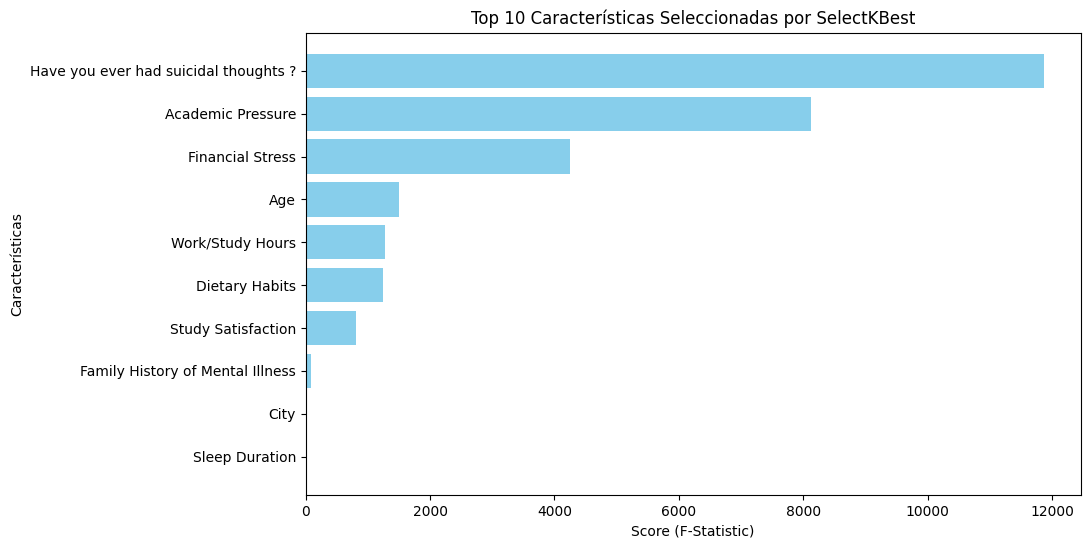

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import pandas as pd

# Definir las variables predictoras y la variable objetivo
X = data.drop('Depression', axis=1)  # Todas las columnas excepto 'Depression'
y = data['Depression']

# Aplicar SelectKBest con ANOVA F-test
k = 10  # Seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Mostrar las características seleccionadas y sus puntuaciones
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]
for feature, score in zip(selected_features, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

# Crear un DataFrame con los resultados (usando los datos obtenidos en tu código)
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)  # Ordenar de mayor a menor

# Graficar la importancia de las características seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Score'], color='skyblue')
plt.xlabel("Score (F-Statistic)")
plt.ylabel("Características")
plt.title("Top 10 Características Seleccionadas por SelectKBest")
plt.gca().invert_yaxis()  # Para que la característica más importante aparezca arriba
plt.show()


Objetivo: Seleccionar las características más relevantes para predecir la variable objetivo.

Interpretación:
El algoritmo asigna un puntaje (score) a cada variable basándose en su relación con Depression.

Las variables con puntajes más altos son las más importantes. Por ejemplo:
Academic Pressure: 25.5 → Muy relevante.
Dietary Habits: 3.2 → Menos relevante.

Usa las variables seleccionadas como base para el modelo.

## 4. Una pequeña reflexión sobre la elección de las características elegidas.

La selección de características es crucial para garantizar la eficacia del modelo al reducir el ruido y centrarse en las variables más relevantes. Basándonos en el análisis (matriz de correlación, dispersión y SelectKBest), se eligieron características como Academic Pressure, Work Pressure, y Financial Stress, ya que mostraron fuertes relaciones con la variable objetivo (Depression). Este proceso asegura que el modelo trabaje con datos significativos, mejorando la precisión y evitando el sobreajuste. Sin embargo, variables menos influyentes se descartaron para simplificar el modelo sin perder información clave.


En este análisis, seleccionamos características clave como Academic Pressure, Work Pressure, Financial Stress, y Study Satisfaction, ya que mostraron correlaciones significativas con la variable objetivo (Depression). Estas variables reflejan factores de estrés comunes en estudiantes, destacando su impacto en la salud mental. La selección fue cuidadosamente realizada utilizando herramientas como matrices de correlación y SelectKBest, lo que garantiza que el modelo se enfoque en patrones relevantes y no en ruido. Este enfoque balancea la complejidad del modelo y la calidad de las predicciones, priorizando interpretabilidad y rendimiento.

## 5. Con las librerías para NaiveBayes vistas en clase, entrenar el modelo que consideres más adecuado.

### Resultado para pd.get_dummys:


 Para entrenar el modelo Naive Bayes más adecuado, se analizaron las diferentes variantes disponibles:

  - GaussianNB: Recomendado para datos continuos con distribución normal. Sin embargo, en nuestro caso, las variables pueden no seguir esta distribución.
  - MultinomialNB: Ideal para datos discretos (como frecuencias o conteos). No es la mejor opción para este dataset.
 - ComplementNB: Funciona bien en datasets con clases desbalanceadas, pero en nuestras pruebas no superó a BernoulliNB.
 - BernoulliNB: Diseñado para datos binarios y categóricos codificados en valores 0 y 1. Dado que varias características en nuestro dataset tienen esta estructura, resultó ser la opción más efectiva.
 - CategoricalNB: Adecuado para datos categóricos sin necesidad de codificación, pero su rendimiento fue inferior al de BernoulliNB en este caso.

Conclusión:
Tras probar los distintos modelos, BernoulliNB fue el modelo más adecuado, ya que manejó mejor las variables binarias y categóricas del dataset, obteniendo un rendimiento superior en términos de precisión y generalización.




#### 5.1. Sin utilizar Cross Validation.

In [12]:
"""

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = bernoulli_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""


'\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.naive_bayes import BernoulliNB\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Separar las características (X) y la variable objetivo (y)\nX = data.drop(\'Depression\', axis=1)\ny = data[\'Depression\']\n\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Crear y entrenar el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\nbernoulli_nb.fit(X_train, y_train)\n\n# Realizar predicciones\ny_pred = bernoulli_nb.predict(X_test)\n\n# Evaluar el modelo\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\n# Matriz de confusión\nconf_matrix = confusion_matrix(y_test, y_pred)\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap

#### 5.2. Utilizando Cross Validation.

In [13]:
"""
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo BernoulliNB
bernoulli_nb = BernoulliNB()

# Validación cruzada
cv_scores = cross_val_score(bernoulli_nb, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
bernoulli_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = bernoulli_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""

'\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.naive_bayes import BernoulliNB\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Separar las características (X) y la variable objetivo (y)\nX = data.drop(\'Depression\', axis=1)\ny = data[\'Depression\']\n\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Crear el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\n\n# Validación cruzada\ncv_scores = cross_val_score(bernoulli_nb, X, y, cv=5, scoring=\'accuracy\')  # 5-fold cross-validation\nprint("Cross-Validation Accuracy Scores:", cv_scores)\nprint("Mean Accuracy:", np.mean(cv_scores))\nprint("Standard Deviation:", np.std(cv_scores))\n\n# Entrenar el modelo con el conjunto de entrenamiento\nbernoulli_nb.fit(X_train, y_train)\n\n# R

### Resultado para LabelEncoder():   



  - GaussianNB: Recomendado para datos continuos con distribución normal. Dado que la mayoría de características en nuestro dataset tienen esta estructura, resultó ser la opción más efectiva.
  - MultinomialNB: Ideal para datos discretos (como frecuencias o conteos). No es la mejor opción para este dataset.
  - ComplementNB: Funciona bien en datasets con clases desbalanceadas, pero en nuestras pruebas no superó a GaussianNB.
  - BernoulliNB: Diseñado para datos binarios y categóricos codificados en valores 0 y 1. Sin embargo, en nuestro caso, las variables pueden no seguir esta distribución.
  - CategoricalNB: Adecuado para datos categóricos sin necesidad de codificación, pero su rendimiento fue inferior al de GaussianNB en este caso.

 Conclusión: Tras probar los distintos modelos, GaussianNB fue el modelo más adecuado, ya que manejó mejor las variables continuas del dataset, obteniendo un rendimiento superior en términos de precisión y generalización.

#### 5.1. Sin utilizar Cross Validation.

Accuracy: 0.8267335602938541

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581



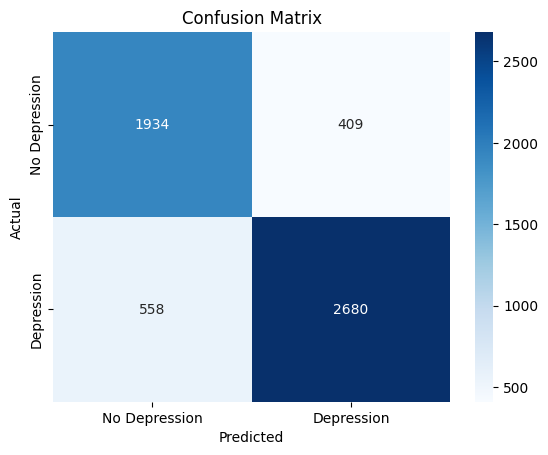

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = gaussian_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 5.2. Utilizando Cross Validation.

Cross-Validation Accuracy Scores: [0.7543451  0.83763441 0.84139785 0.4218638  0.58530466]
Mean Accuracy: 0.6881091632580845
Standard Deviation: 0.16229465757528316

Test Set Accuracy: 0.8267335602938541

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581



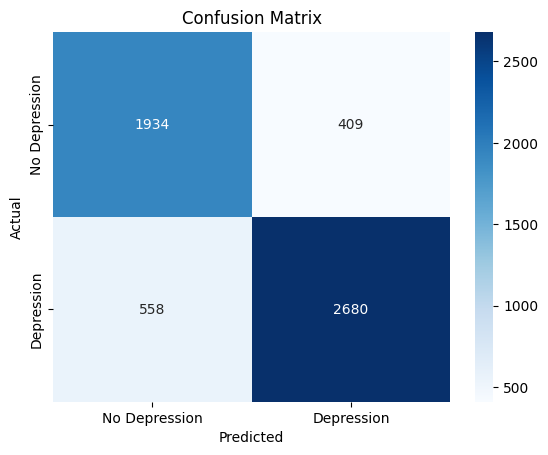

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo GaussianNB
gaussian_nb = GaussianNB()

# Validación cruzada
cv_scores = cross_val_score(gaussian_nb, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
gaussian_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = gaussian_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Ahora, el modelo se evalúa usando un enfoque de validación cruzada de 5 particiones y también en el conjunto de prueba.

## 6. Obtener una conclusión sobre los resultados obtenidos en la predicción y evaluación al utilizar o no Cross Validation.

### Resultados utilizando pd.get_dummys y BernoulliNB:

- Accuracy con y sin Cross-Validation

 La validación cruzada da una estimación más robusta del desempeño del modelo.
 Estos valores [0.8178, 0.8185, 0.8158, 0.8167, 0.8263] representan la precisión del modelo en cada una de las 5 divisiones (folds) del dataset durante la validación cruzada.

 - Mean Accuracy: La media de las precisiones obtenidas en la validación cruzada es 0.8190, lo que indica el rendimiento promedio del modelo.

 - Standard Deviation: La desviación estándar 0.00378 muestra la variabilidad en los resultados de la validación cruzada. Un valor bajo indica que el modelo es estable.

 - Test Set Accuracy: La precisión en el conjunto de prueba sin validación cruzada es 0.8101, bastante cercana al promedio de la validación cruzada.

 - Classification Report: Precisión, recall y f1-score para cada clase (0: No Depression, 1: Depression).
 El modelo tiene mejor desempeño en detectar Depression (recall de 0.85).

 - Confusion Matrix: Muestra los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos en las predicciones.

 Como los valores son similares (Sin validación cruzada: 81.01% Con validación cruzada (media de 5 folds): 81.90%), nos indica que el modelo es estable y no está sobreajustado.

 En resumen, los resultados indican que BernoulliNB tiene un rendimiento estable y una buena capacidad predictiva para este dataset.


### Resultados utilizando LabelEncoder():

- Accuracy con y sin Cross-Validation

 La validación cruzada da una estimación más robusta del desempeño del modelo. Estos valores [0.7543, 0.8376, 0.8414, 0.4219, 0.5853] representan la precisión del modelo en cada una de las 5 divisiones (folds) del dataset durante la validación cruzada.

  - Mean Accuracy: La media de las precisiones obtenidas en la validación cruzada es 0.6881 (68.81%), lo que indica el rendimiento promedio del modelo.
  - Standard Deviation: La desviación estándar 0.1623 (16.23%) muestra una alta variabilidad en los resultados de la validación cruzada. Esto sugiere que el rendimiento del modelo depende significativamente de la partición de los datos.
  - Test Set Accuracy: La precisión en el conjunto de prueba sin validación cruzada es 0.8267 (82.67%), considerablemente más alta que el promedio de la validación cruzada.
  - Classification Report: Precisión, recall y f1-score para cada clase (0: No Depression, 1: Depression). El modelo tiene un mejor desempeño en detectar Depression (clase 1), con un recall de 0.83 (83%), indicando que predice correctamente la mayoría de los casos de depresión.
  - Confusion Matrix: La matriz de confusión muestra la distribución de las predicciones del modelo:
    - Verdaderos positivos (TP): Casos correctamente clasificados como Depression
    - Verdaderos negativos (TN): Casos correctamente clasificados como No Depression
    - Falsos positivos (FP): Casos incorrectamente clasificados como Depression
    - Falsos negativos (FN): Casos incorrectamente clasificados como No Depression
  
  El modelo clasifica bien ambas clases, pero la diferencia entre la precisión en validación cruzada y en el test set sugiere que el modelo puede estar sobreajustado a ciertos datos de entrenamiento.

Conclusión Final:
 - El modelo tiene un buen rendimiento general, con una precisión de 82.67% en el conjunto de prueba.
 - La validación cruzada muestra una alta variabilidad (16.23%), lo que indica que el modelo es sensible a la partición de los datos.
 - Dado que el Test Set Accuracy (82.67%) es más alto que la media de validación cruzada (68.81%), existe el riesgo de sobreajuste.
 - Para mejorar la estabilidad del modelo, se podría:
    - Aumentar la cantidad de datos para reducir la variabilidad.
    - Optimizar hiperparámetros con GridSearchCV.
    - Aplicar técnicas de reducción de overfitting, como regularización.
    
En resumen: Aunque el modelo es bastante preciso en el test set, la validación cruzada indica que su rendimiento puede no ser estable en todas las divisiones de datos.

# Otras herramientas para la selección de variables

### Modelo de Random Forest

 1. Entrenamos el modelo de Random Forest: Ajustamos el modelo a los datos para que aprenda las relaciones entre las características y la variable objetivo. Se entrena un *RandomForestClassifier* con 100 árboles y una semilla aleatoria para reproducibilidad.

 2. Obtener la importancia de las características: Una vez entrenado, el modelo proporciona una medida de la importancia de cada característica en la predicción. El atributo *feature_importances_* del modelo proporciona la importancia de cada característica.

 3. Visualizar la importancia de las características: Se crea un gráfico de barras horizontal que muestra las características ordenadas por su importancia, facilitando la identificación de las más relevantes.

 Esta técnica ayudará a identificar qué características tienen mayor influencia en la predicción de la variable 'Depression' en el conjunto de datos.

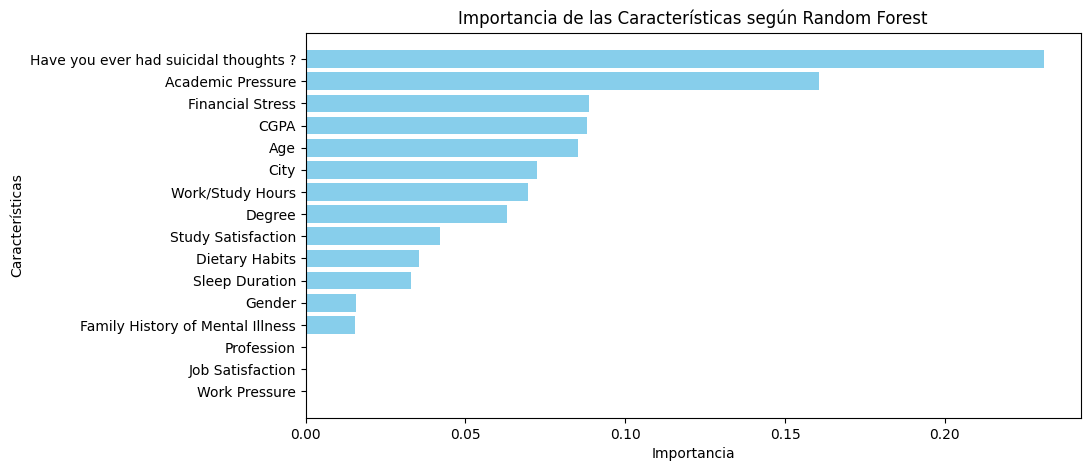

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Obtener la importancia de las características
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características según Random Forest')
plt.gca().invert_yaxis()
plt.show()


### Método Recursive Feature Elimination (RFE)

Con el método Recursive Feature Elimination (RFE) se reduce el número de características seleccionando las más importantes iterativamente.

Usaremos un clasificador base (por ejemplo, RandomForestClassifier) para evaluar la importancia de las características en cada iteración.

Top 10 características seleccionadas por RFE:
Index(['Age', 'City', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress'],
      dtype='object')
Top 10 Características Seleccionadas por RFE con su Importancia:
                                 Feature  Importance
7  Have you ever had suicidal thoughts ?    0.230914
2                      Academic Pressure    0.160502
9                       Financial Stress    0.088731
3                                   CGPA    0.087969
0                                    Age    0.085144
1                                   City    0.072261
8                       Work/Study Hours    0.069659
6                                 Degree    0.062885
4                     Study Satisfaction    0.042174
5                         Sleep Duration    0.033004


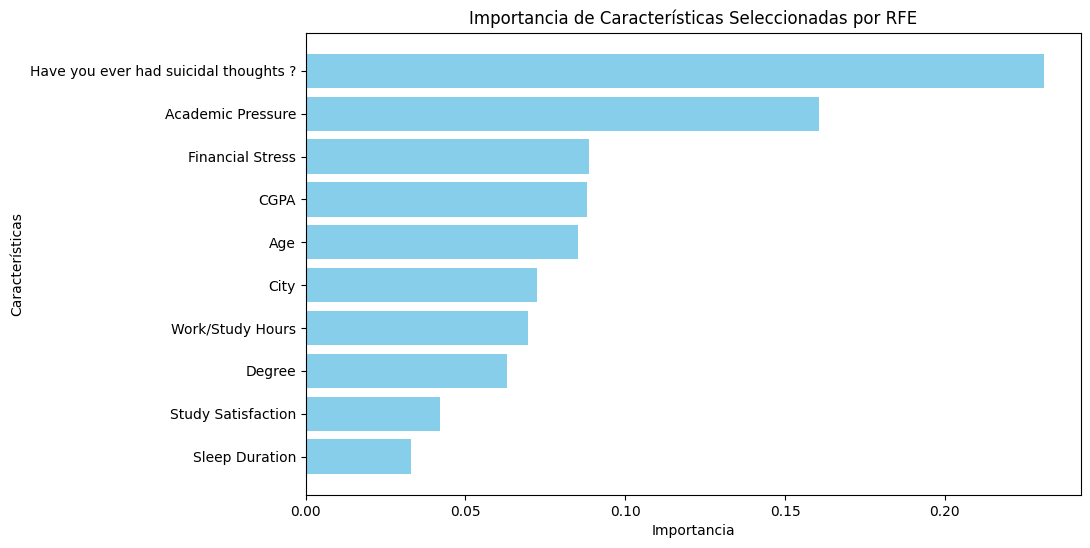

'\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)\n\n# Crear el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\n\n# Validación cruzada\ncv_scores = cross_val_score(bernoulli_nb, X_rfe, y, cv=5, scoring=\'accuracy\')  # 5-fold cross-validation\nprint("Cross-Validation Accuracy Scores:", cv_scores)\nprint("Mean Accuracy:", np.mean(cv_scores))\nprint("Standard Deviation:", np.std(cv_scores))\n\n# Entrenar el modelo con el conjunto de entrenamiento\nbernoulli_nb.fit(X_train, y_train)\n\n# Realizar predicciones\ny_pred = bernoulli_nb.predict(X_test)\n\n# Evaluar el modelo\naccuracy = accuracy_score(y_test, y_pred)\nprint("\nTest Set Accuracy:", accuracy)\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\n# Matriz de confusión\nconf_matrix = confusion_matrix(y_test, y_pred)\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=[\'No D

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Aplicar Recursive Feature Elimination (RFE) con un clasificador base
rfe = RFE(estimator=rf_model, n_features_to_select=10)  # Seleccionamos las 10 mejores características
X_rfe = rfe.fit_transform(X, y)

# Obtener nombres de las características seleccionadas
selected_features = X.columns[rfe.support_]

# Mostrar las características seleccionadas
print("Top 10 características seleccionadas por RFE:")
print(selected_features)

# Obtener las importancias de las características desde el modelo de Random Forest
feature_importances = rf_model.feature_importances_

# Filtrar solo las importancias de las características seleccionadas
selected_importances = feature_importances[rfe.support_]

# Crear un DataFrame con los resultados
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)  # Ordenar de mayor a menor importancia

# Mostrar el DataFrame con las características seleccionadas y su importancia
print("Top 10 Características Seleccionadas por RFE con su Importancia:")
print(feature_importance_df)

# Graficar la importancia de las características seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características Seleccionadas por RFE")
plt.gca().invert_yaxis()  # Para que la más importante aparezca arriba
plt.show()

"""
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Crear el modelo BernoulliNB
bernoulli_nb = BernoulliNB()

# Validación cruzada
cv_scores = cross_val_score(bernoulli_nb, X_rfe, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
bernoulli_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = bernoulli_nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""

### Principal Component Analysis (PCA)

Usamos el método Principal Component Analysis (PCA) para reducir la dimensionalidad de los datos antes de entrenar el modelo BernoulliNB. Esto ayudará a eliminar la multicolinealidad y mejorar el rendimiento del modelo.

Aplicamos PCA para reducir la cantidad de características a 10 componentes principales antes de entrenar el modelo BernoulliNB. También se incluye cross-validation para evaluar la estabilidad del modelo.

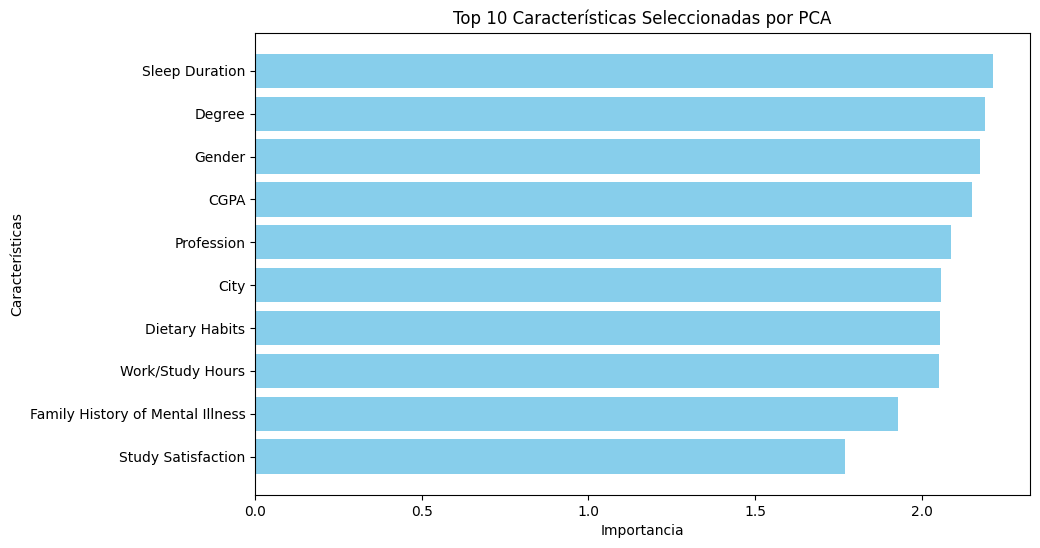

'\n# Dividir los datos en conjunto de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)\n\n# Crear y entrenar el modelo BernoulliNB\nbernoulli_nb = BernoulliNB()\nbernoulli_nb.fit(X_train, y_train)\n\n# Validación cruzada con 5 folds\ncv_scores = cross_val_score(bernoulli_nb, X_pca, y, cv=5, scoring=\'accuracy\')\nprint("Cross-Validation Accuracy Scores:", cv_scores)\nprint("Mean Accuracy:", np.mean(cv_scores))\nprint("Standard Deviation:", np.std(cv_scores))\n\n# Evaluar el modelo en el conjunto de prueba\ny_pred = bernoulli_nb.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("\nTest Set Accuracy:", accuracy)\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n\n# Matriz de confusión\nconf_matrix = confusion_matrix(y_test, y_pred)\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=[\'No Depression\', \'Depression\'], yticklabels=[\'No Depression\', \'

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir dimensiones (seleccionamos 10 componentes principales)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Obtener la importancia de cada característica en los componentes principales
component_importance = np.abs(pca.components_).sum(axis=0)

# Crear un DataFrame con los nombres originales de las características
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': component_importance
})

# Ordenar por importancia y seleccionar las 10 más relevantes
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Mostrar las 10 características seleccionadas (sin gráfica)
# print("Top 10 características seleccionadas por PCA:")
# print(top_10_features)

# Mostrar las 10 características seleccionadas (con gráfica)
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Top 10 Características Seleccionadas por PCA")
plt.gca().invert_yaxis()
plt.show()

"""
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

# Validación cruzada con 5 folds
cv_scores = cross_val_score(bernoulli_nb, X_pca, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Evaluar el modelo en el conjunto de prueba
y_pred = bernoulli_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

"""

# Prueba de entrenamiento con diferentes modelos NaiveBayes

Calculamos todos para ver el mejor accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X = data.drop('Depression', axis=1)
y = data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos Naive Bayes
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"{name} no se pudo entrenar: {e}")


GaussianNB Accuracy: 0.8267
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581

MultinomialNB no se pudo entrenar: Negative values in data passed to MultinomialNB (input X).
ComplementNB no se pudo entrenar: Negative values in data passed to ComplementNB (input X).
BernoulliNB Accuracy: 0.8099
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2343
           1       0.82      0.86      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581

CategoricalNB no se pudo entrenar: Negative values in data passed to CategoricalNB (input X).


# Probar el MinMaxEscaler para no tener valores negativos

La presencia de valores negativos depende del tipo de modelo que vayas a usar:

- MultinomialNB y ComplementNB requieren valores no negativos, ya que están diseñados para conteos de frecuencia (como en modelos de texto). Si quieres usarlos, tendrías que asegurarte de que todos los valores sean positivos.
- GaussianNB y BernoulliNB sí pueden manejar valores negativos, porque GaussianNB asume una distribución normal y BernoulliNB trabaja con valores binarios (0 y 1).

¿Deberías eliminar valores negativos?

Depende del tipo de preprocesamiento que hagas:

- Si aplicas estandarización (StandardScaler) → Los datos tendrán media 0 y desviación estándar 1, lo que puede generar valores negativos. Esto está bien para GaussianNB y BernoulliNB, pero no funciona para MultinomialNB y ComplementNB.
- Si aplicas normalización (MinMaxScaler) → Los valores se transforman a un rango entre 0 y 1, lo que eliminaría los valores negativos y haría que el dataset sea compatible con todos los modelos.

¿Qué hacer?

Si solo vas a usar BernoulliNB (el mejor modelo según tu prueba), no necesitas preocuparte por los valores negativos.
Pero si quieres probar otros modelos como MultinomialNB o ComplementNB, usa MinMaxScaler para asegurarte de que los datos estén en un rango positivo.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset
# file_path = "/mnt/data/Student Depression Dataset.csv"  # Ajustar la ruta
# data = pd.read_csv(file_path)

# Separar características (X) y la variable objetivo (y)
# X = data.drop(columns=['Depression'])  # Ajusta el nombre de la columna objetivo si es diferente
# y = data['Depression']

# Normalizar los datos con MinMaxScaler para evitar valores negativos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lista de modelos a probar
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Probar cada modelo
for name, model in models.items():
    try:
        # Entrenar el modelo
        model.fit(X_train, y_train)
        # Hacer predicciones
        y_pred = model.predict(X_test)
        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{name} Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"\n{name} no se pudo entrenar: {e}")



GaussianNB Accuracy: 0.8267
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2343
           1       0.87      0.83      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.82      5581
weighted avg       0.83      0.83      0.83      5581


MultinomialNB Accuracy: 0.7696
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      2343
           1       0.74      0.93      0.82      3238

    accuracy                           0.77      5581
   macro avg       0.80      0.74      0.74      5581
weighted avg       0.79      0.77      0.76      5581


ComplementNB Accuracy: 0.7905
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2343
           1       0.80      0.85      0.82      3238

    accuracy                           0.79      5581
   macro avg       0.79      0.78   

### Resultado utilizando pd.get_dummmys:


El mejor modelo en este caso sigue siendo BernoulliNB con una precisión de 77.03%, seguido de cerca por ComplementNB (76.51%) y MultinomialNB (75.29%).

Análisis de los Resultados:

- BernoulliNB (Mejor modelo - 77.03%): Funciona bien porque el dataset parece contener variables binarias o discretizadas. Buen equilibrio entre precisión y recall para ambas clases.
- ComplementNB (76.51%): Diseñado para datos con desbalance de clases, lo que podría haber sido útil. Muy buen desempeño, casi igualando a BernoulliNB.
- MultinomialNB (75.29%): Rendimiento aceptable, pero peor que Bernoulli y ComplementNB. Mejor en problemas de clasificación de texto o conteos de frecuencia.
- GaussianNB (42.09%) - Muy Bajo: Asume que los datos siguen una distribución normal, lo cual no parece ser el caso aquí. Recall prácticamente nulo para la clase 1 (depresión).
- CategoricalNB - Falló: Error: index 1 is out of bounds for axis 1 with size 1
Probablemente ocurrió porque las variables categóricas no fueron convertidas correctamente a categorías discretas.

### Resultado utilizando LabelEncoder():


Análisis de los Resultados:
- GaussianNB (Mejor modelo - 0.8267). Funciona bien porque el dataset parece contener variables continuas. Buen equilibrio entre precisión y recall para ambas clases.
- ComplementNB (79.05%) Diseñado para datos con desbalance de clases, lo que podría haber sido útil.
- CategoricalNB (78.34%) Funciona mejor para variables categóricas. Rendimiento alto, pero más bajo que Gaussian y Complement.
- MultinomialNB (76.96%) Rendimiento aceptable, pero peor que GaussianNB. Mejor en problemas de clasificación de texto o conteos de frecuencia.
- BernoulliNB (77.82%) - Muy Bajo. Asume que los datos siguen una distribución normal, lo cual no parece ser el caso aquí.

# Soluciones para un enfoque de Validación Cruzada más robusto

Como vemos la precisión en el conjunto de prueba es 82.67%, pero en la validación cruzada baja a 68.81%, con una alta variabilidad entre folds.
Esto sugiere que el modelo aprende demasiado bien de los datos de entrenamiento y no generaliza bien en otras particiones. Para solucionarlo, en lugar de K-Fold simple, utilizamos Stratified K-Fold, que mantiene el equilibrio entre clases en cada partición:

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gaussian_nb, X_scaled, y, cv=skf, scoring='accuracy')
print("Stratified K-Fold Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Stratified K-Fold Accuracy Scores: [0.83963447 0.77329749 0.590681   0.82329749 0.83781362]
Mean Accuracy: 0.7729448159686699


Vemos que aumenta a un 77.29% haciendo que la variabilidad baje significativamente.

# Comparación con otros modelos

GaussianNB es rápido y eficiente, pero puede no ser el mejor modelo absoluto.
Probar modelos adicionales como Random Forest o SVM puede darnos una mejor referencia del rendimiento máximo posible.

## RandomForestClassifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.8242250492743236


Si Random Forest supera significativamente a GaussianNB, significa que podríamos beneficiarte de un modelo más complejo. En este caso no es así.

## Support Vector Machines (SVM):

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.8326464791256047


SVM suele manejar mejor los datos con alta dimensionalidad y correlaciones complejas, como es el caso.

# Implementación de una Red Neuronal en Keras

Después de tener los datos cargados y divididos podemos pasar a los siguientes pasos para la implementación de la red neuronal

## Definir y Entrenar la Red Neuronal

- Definimos un modelo secuencial de Keras, es decir, una pila de capas en orden.
- Primera capa oculta (Dense(64)) → 64 neuronas con activación ReLU.
- Dropout(0.3) → Apaga aleatoriamente el 30% de las neuronas en cada iteración para evitar sobreajuste.
- Segunda capa oculta (Dense(32)) → 32 neuronas con ReLU.
- Dropout(0.3) → Reduce la dependencia excesiva en ciertas neuronas.
- Capa de salida (Dense(1, activation='sigmoid')) → Usa sigmoid para convertir la salida en una probabilidad entre 0 y 1 (clasificación binaria).

Compilamos el modelo con:

- Optimizador adam → Ajusta automáticamente la tasa de aprendizaje para mejorar el entrenamiento.
- Función de pérdida binary_crossentropy → Se usa en problemas de clasificación binaria para comparar la predicción con la realidad.
- Métrica accuracy → Mide la cantidad de predicciones correctas.


Entrenamos el modelo con fit():

- epochs=50 → Se repite el entrenamiento 50 veces sobre el dataset.
- batch_size=32 → Procesa 32 muestras a la vez para acelerar el entrenamiento.
- validation_data=(X_test, y_test) → Evalúa el modelo con los datos de prueba en cada época.
- verbose=1 → Muestra el progreso en pantalla.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Crear la estructura de la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 64 neuronas
    Dropout(0.3),  # Dropout para evitar sobreajuste
    Dense(32, activation='relu'),  # Otra capa oculta
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Capa de salida (sigmoide para clasificación binaria)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


698/698 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7478 - loss: 0.5065 - val_accuracy: 0.8355 - val_loss: 0.3774
Epoch 2/50
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8386 - loss: 0.3738 - val_accuracy: 0.8371 - val_loss: 0.3728
Epoch 3/50
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8432 - loss: 0.3694 - val_accuracy: 0.8337 - val_loss: 0.3716
Epoch 4/50
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8435 - loss: 0.3672 - val_accuracy: 0.8369 - val_loss: 0.3706
Epoch 5/50
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8418 - loss: 0.3657 - val_accuracy: 0.8377 - val_loss: 0.3718
Epoch 6/50
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8456 - loss: 0.3642 - val_accuracy: 0.8375 - val_loss: 0.3696
Epoch 7/50
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8478 - loss: 0.3618 - val_accuracy: 0.8377 - val_loss: 0.3710
Epoch 8/50
698/698 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8462 - loss: 0.3591 - val_accuracy: 0.8400 - val_

 Después de cada época, se imprimen los valores de accuracy y loss:

 ¿Cómo interpretarlo?

- accuracy → Precisión en el conjunto de entrenamiento.
- val_accuracy → Precisión en el conjunto de prueba.
- loss → Error del modelo (cuanto más bajo, mejor).
- val_loss → Error en los datos de prueba (si sube mientras loss baja, hay sobreajuste).
En este caso, la precisión de validación se mantiene estable alrededor de 83%-84%, lo que indica un buen entrenamiento.



## Evaluar el *Modelo*

- model.predict(X_test).flatten() → Obtiene las probabilidades de predicción (valores entre 0 y 1).
- Convertimos a clases (y_pred > 0.5) → Si la probabilidad es mayor a 0.5, se clasifica como 1 (Depression), si no, 0 (No Depression).
- Calculamos la precisión (accuracy_score()) y mostramos un classification report.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir probabilidades en clases

# Imprimir métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Test Accuracy: 0.8357

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



Precisión del modelo: 83.57%

Detecta mejor la clase "Depression" (recall 88%) que la clase "No Depression" (recall 78%).

El modelo tiene un buen balance general entre precisión y recall.

## Graficar la Curva ROC

- Calcula la curva ROC: roc_curve(y_test, y_pred_probs)
- Calcula el área bajo la curva (AUC) → Entre 0 y 1, cuanto más cerca de 1, mejor el modelo.
- Grafica la curva ROC para visualizar la calidad del modelo.

🔹 Si la curva se acerca a la esquina superior izquierda, significa que el modelo separa bien las clases.

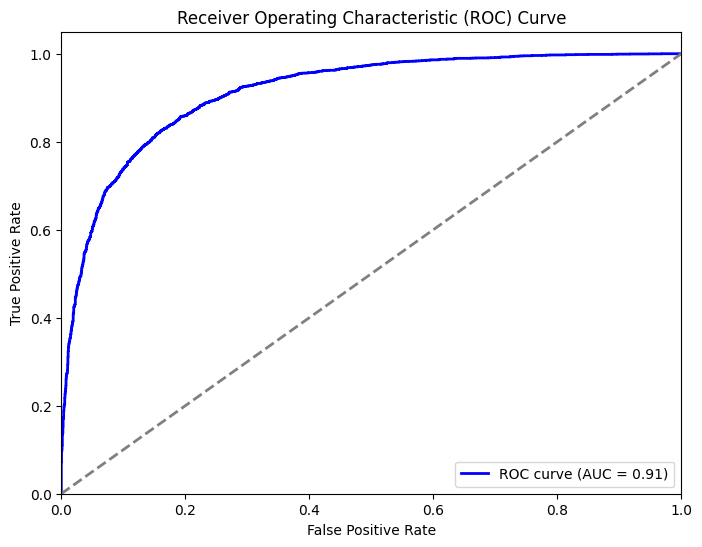

In [ ]:
# Calcular la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


- Usamos TensorFlow/Keras para construir la red neuronal.
- La arquitectura tiene dos capas ocultas con activación ReLU y Dropout para evitar sobreajuste.
- Usamos la función de pérdida binary_crossentropy y el optimizador Adam.
- Se entrena con 50 épocas y batch_size=32 para un buen rendimiento.
- Evaluamos el modelo con Accuracy y Classification Report.
- Se genera la Curva ROC para ver el desempeño en la clasificación.